#### Import relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data

##### Sources: 
- https://www.kaggle.com/gsutters/the-human-freedom-index/version/2#_=_
- Wimmer and Min (2006) – “From empire to nation-state: Explaining war in the modern world, 1816-2001”, American Sociological Review 71(6):867-897, 2006.

In [20]:
hf_df = pd.read_csv('../data/human_freedom.csv')
colonies_df = pd.read_csv('../data/temp.csv', sep=';')

In [5]:
hf_df.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.241402,57.0,2.0


In [21]:
colonies_df.head()

,country,imppower
0,Canada,United Kingdom
1,Cuba,Spain
2,Cuba,USA
3,Haiti,USA
4,Dominican Rep.,Spain


In [38]:
unique_powers = colonies_df['imppower'].unique()
unique_powers

array(['United Kingdom', 'Spain', 'USA', 'Haiti', 'Colombia',
       'Netherlands', 'Bolivia', 'Portugal', 'Brazil', 'Germany',
       'MIXED RULE', 'Austria-Hungary', 'Russia', 'Czechoslovakia',
       'Turkey', 'Yugoslavia', 'Sweden', 'Denmark', 'France', 'Sudan',
       'Belgium', 'Egypt', 'Italy', 'Ethiopia', 'South Africa', 'China',
       'Korea', 'Japan', 'Pakistan', 'Thailand', 'Australia'],
      dtype=object)

In [22]:
colonies_df['imppower'].value_counts()

United Kingdom     36
France             22
Spain              18
Turkey             17
Russia             16
MIXED RULE         12
Germany            10
Austria-Hungary     8
Portugal            5
Yugoslavia          4
USA                 4
Egypt               4
Netherlands         3
Belgium             3
Colombia            2
Czechoslovakia      2
Korea               2
Japan               2
China               2
Brazil              1
Pakistan            1
Sudan               1
Sweden              1
Italy               1
Thailand            1
South Africa        1
Bolivia             1
Haiti               1
Ethiopia            1
Denmark             1
Australia           1
Name: imppower, dtype: int64

In [29]:
uk_colonies = list(colonies_df[colonies_df['imppower'] == 'United Kingdom']['country'])
uk_colonies

['Canada',
 'Belize',
 'Guyana',
 'Ireland',
 'Cyprus',
 'Equatorial Guinea',
 'Gambia, The',
 'Sierra Leone',
 'Ghana',
 'Nigeria',
 'Uganda',
 'Kenya',
 'Tanzania',
 'Somalia',
 'Eritrea',
 'Zambia',
 'Zimbabwe',
 'Malawi',
 'South Africa',
 'Lesotho',
 'Botswana',
 'Swaziland',
 'Iraq',
 'Egypt',
 'Israel',
 'Yemen, Rep.',
 'Qatar',
 'India',
 'Pakistan',
 'Bangladesh',
 'Myanmar',
 'Sri Lanka',
 'Malaysia',
 'Australia',
 'Pap. New Guinea',
 'New Zealand']

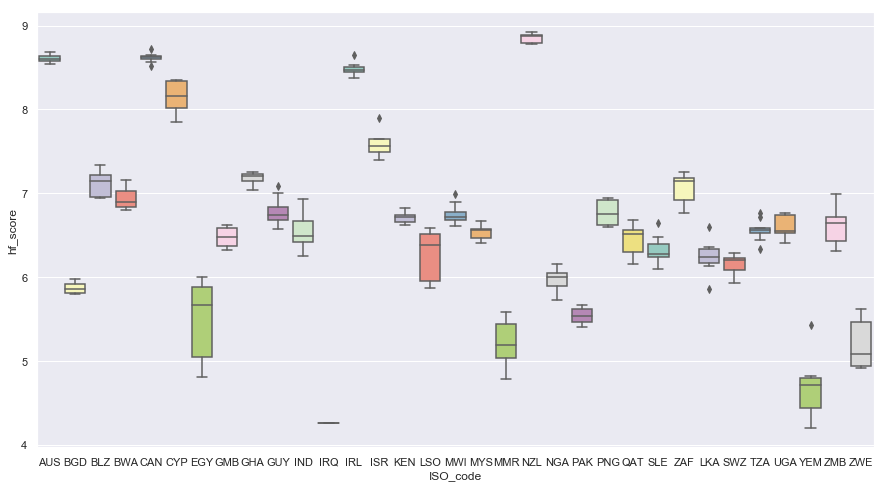

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x="ISO_code", y="hf_score", data=hf_df[hf_df['countries'].isin(uk_colonies)], palette="Set3")

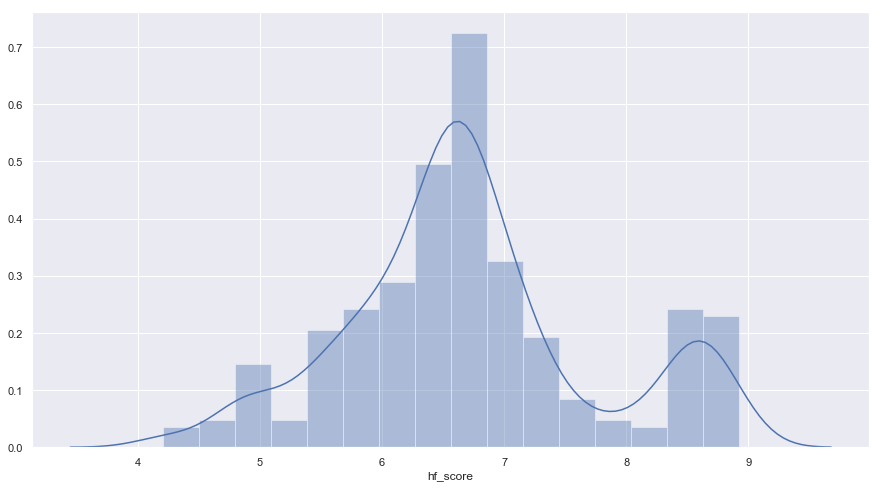

In [36]:
sns.distplot(hf_df[hf_df['countries'].isin(uk_colonies)]['hf_score'])

In [35]:
hf_df[hf_df['countries'].isin(uk_colonies)]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
5,2016,AUS,Australia,Oceania,8.582219,4.0,1.0
10,2016,BGD,Bangladesh,South Asia,5.801300,138.0,4.0
14,2016,BLZ,Belize,Latin America & the Caribbean,7.145432,64.0,2.0
19,2016,BWA,Botswana,Sub-Saharan Africa,7.153167,64.0,2.0
27,2016,CAN,Canada,North America,8.565863,5.0,1.0
39,2016,CYP,Cyprus,Eastern Europe,8.112197,30.0,1.0
44,2016,EGY,Egypt,Middle East & North Africa,4.807277,156.0,4.0
52,2016,GMB,"Gambia, The",Sub-Saharan Africa,6.321342,115.0,3.0
55,2016,GHA,Ghana,Sub-Saharan Africa,7.236089,57.0,2.0
60,2016,GUY,Guyana,Latin America & the Caribbean,6.675898,96.0,3.0


/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


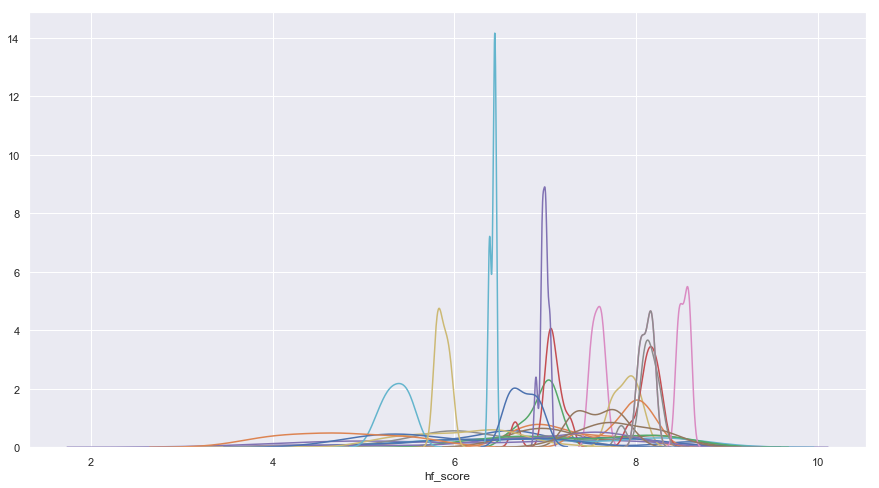

In [48]:
for colonizer in unique_powers:
    colonies = list(colonies_df[colonies_df['imppower'] == colonizer]['country'])
    sns.distplot(hf_df[hf_df['countries'].isin(colonies)]['hf_score'], hist=False)

/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


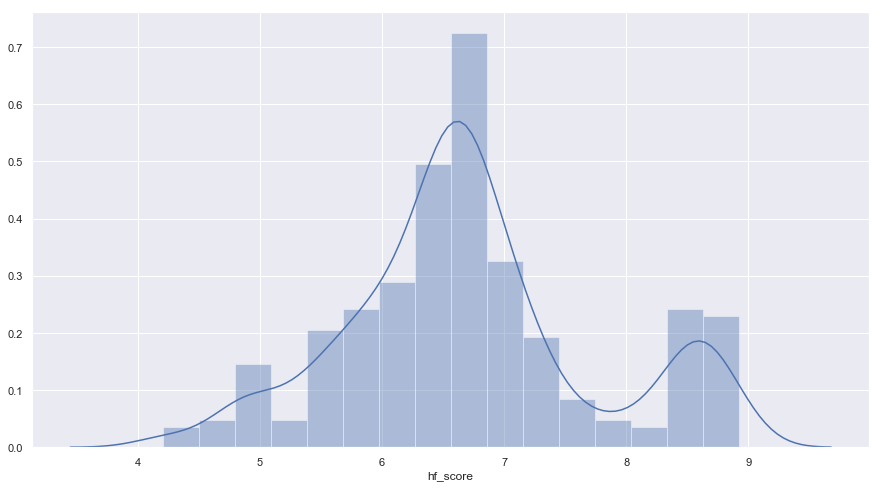

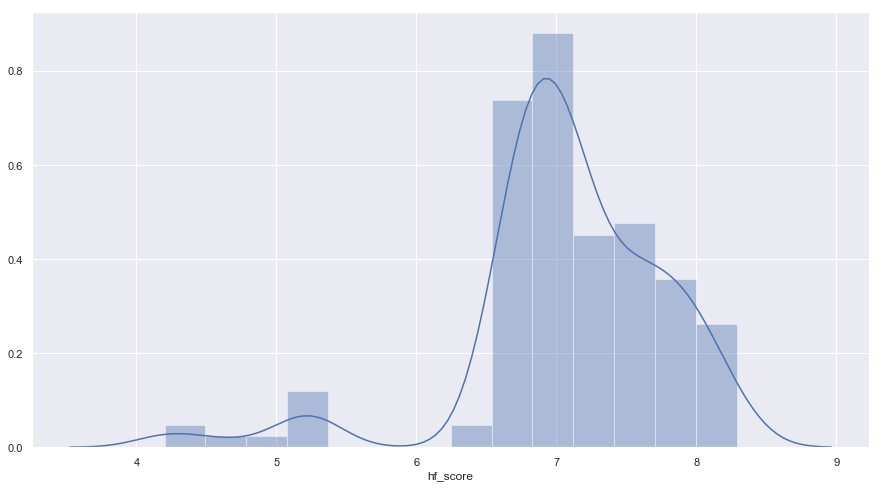

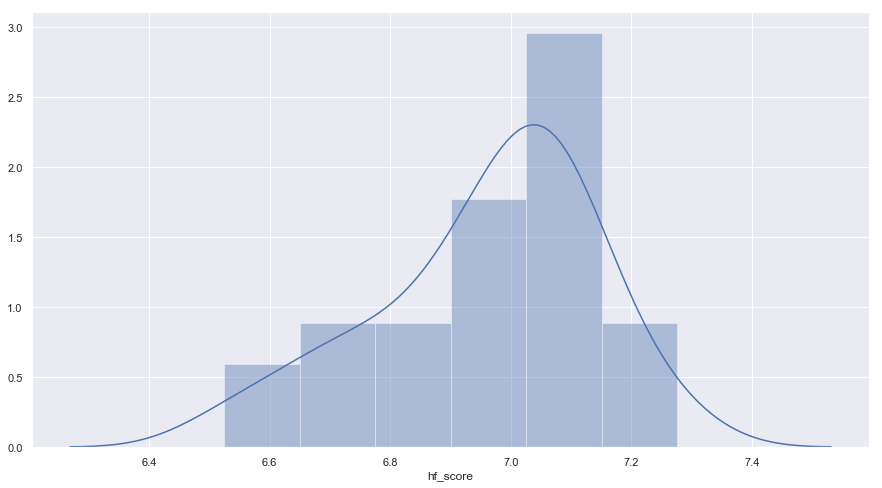

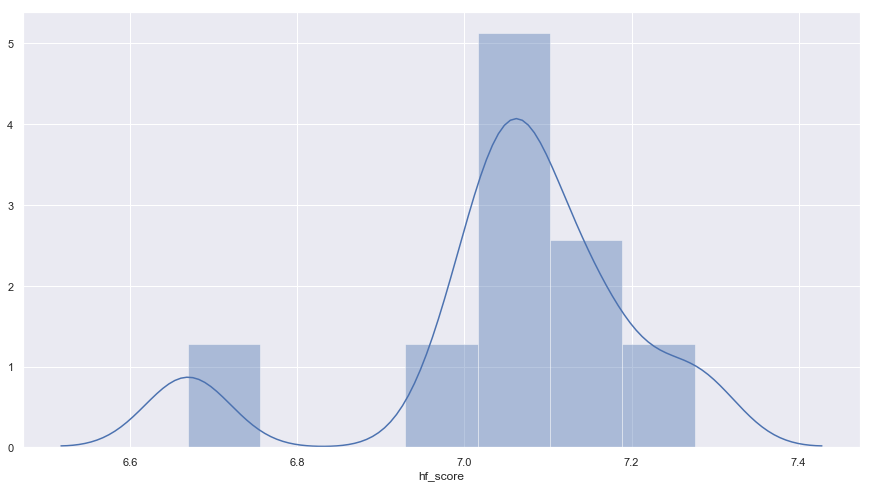

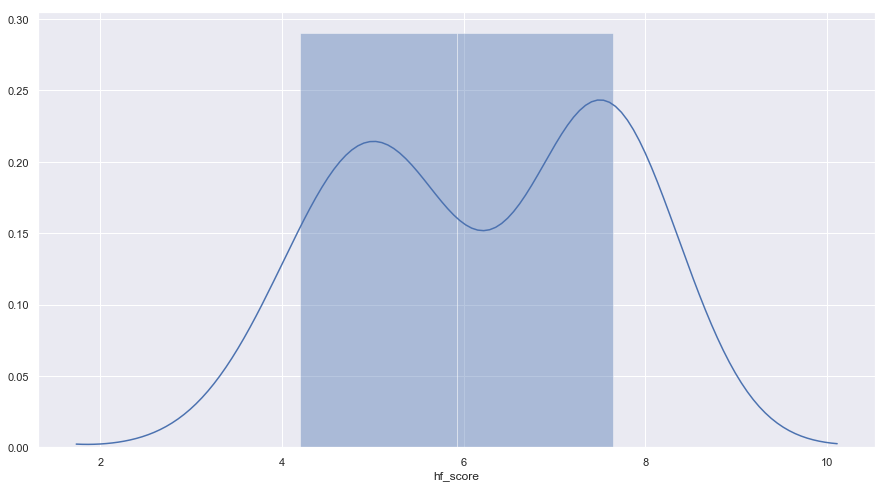

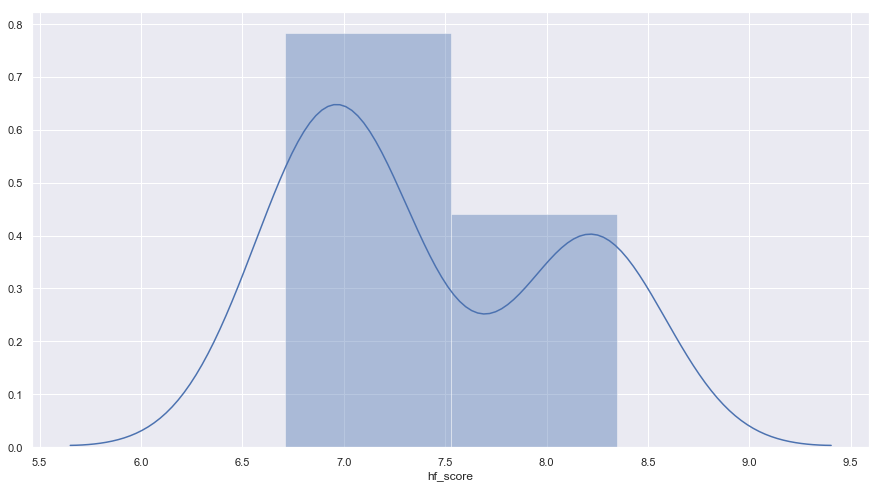

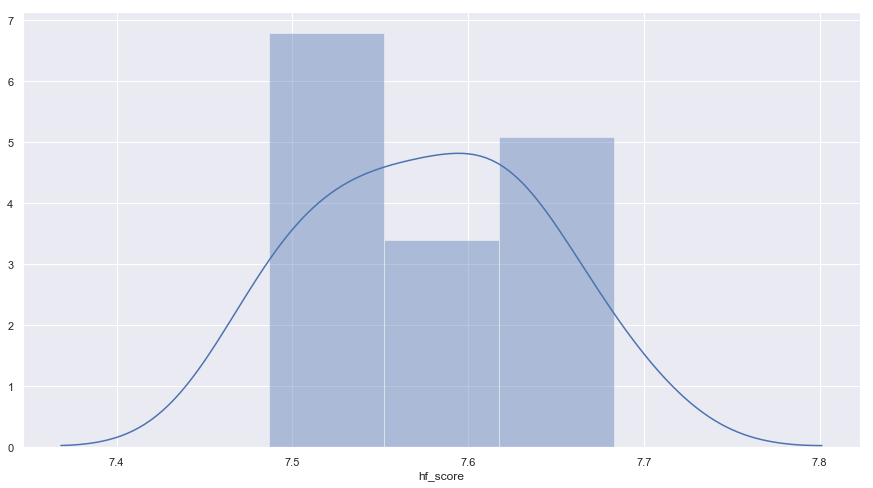

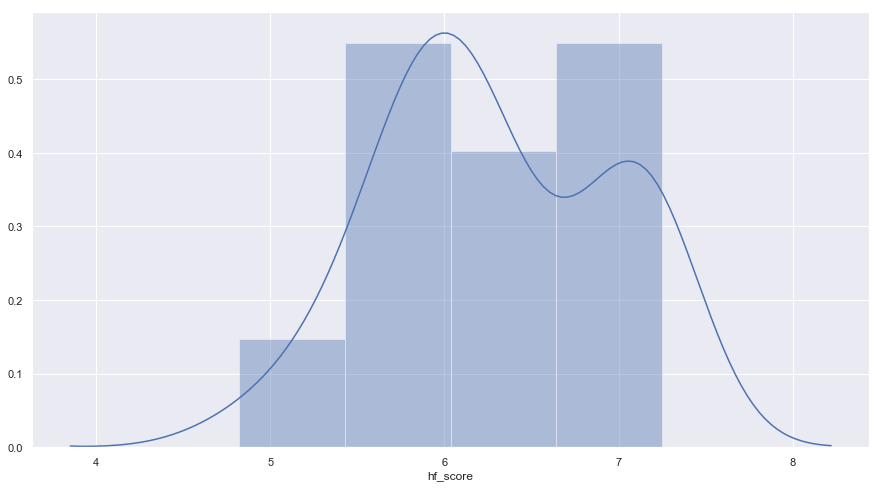

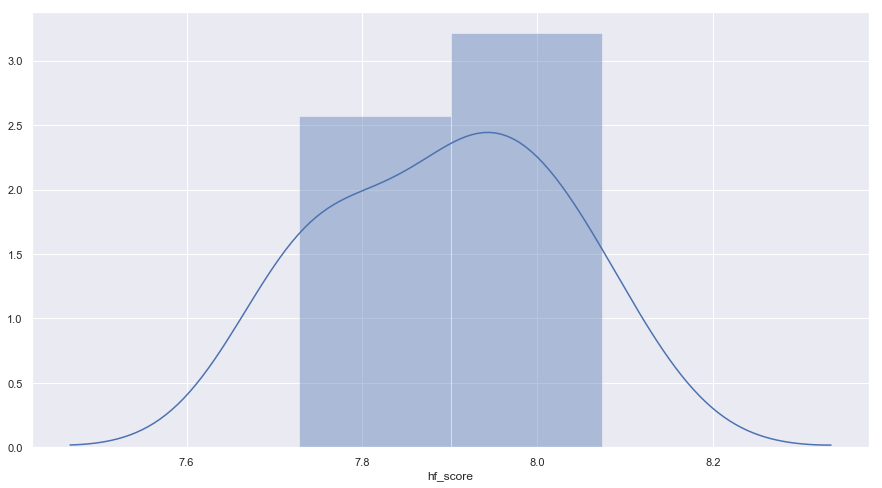

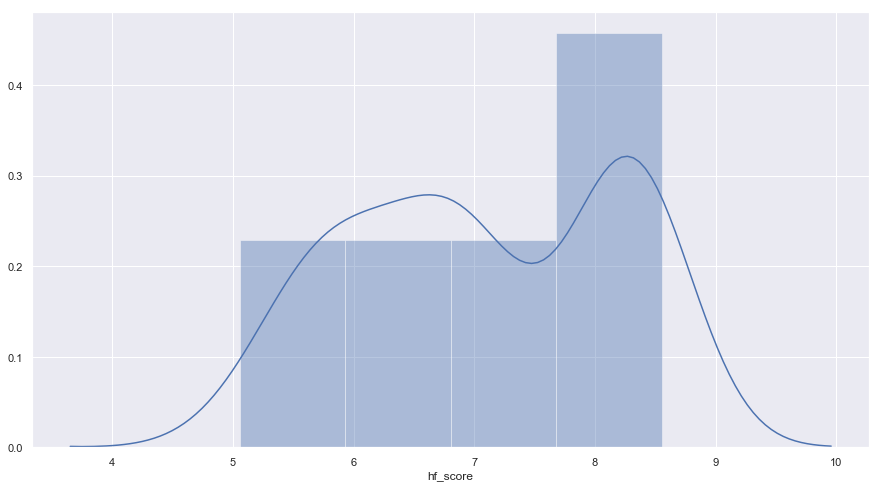

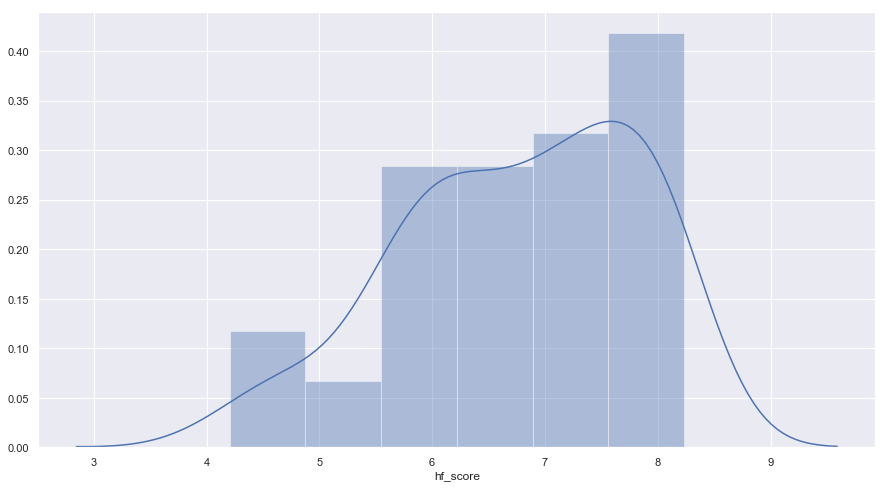

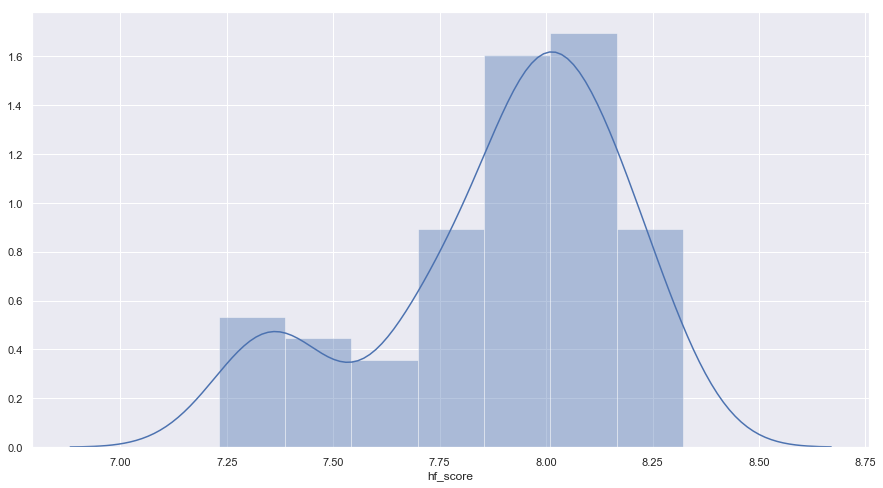

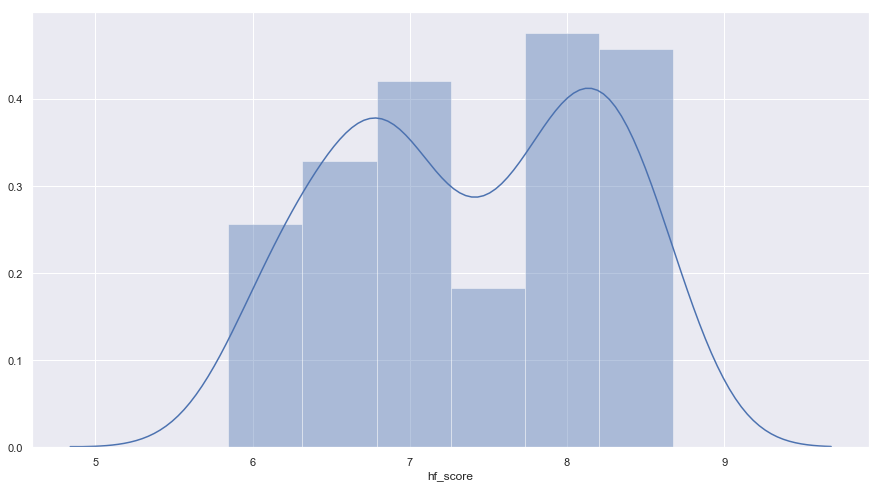

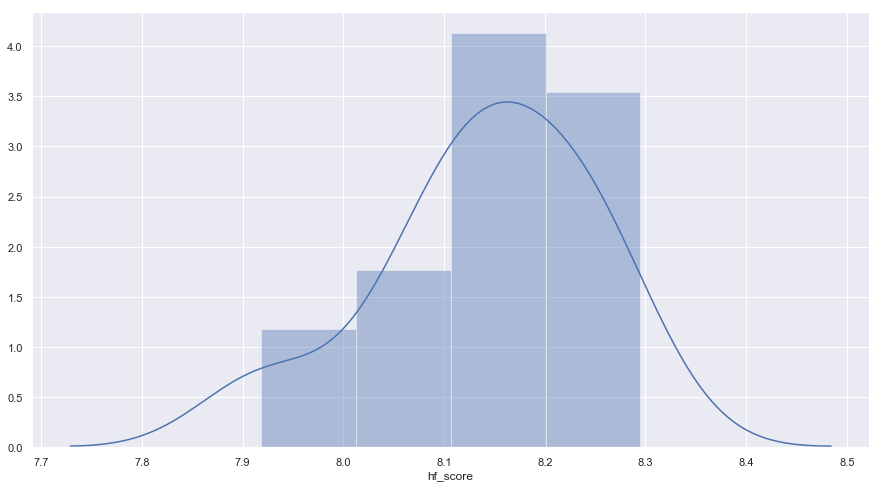

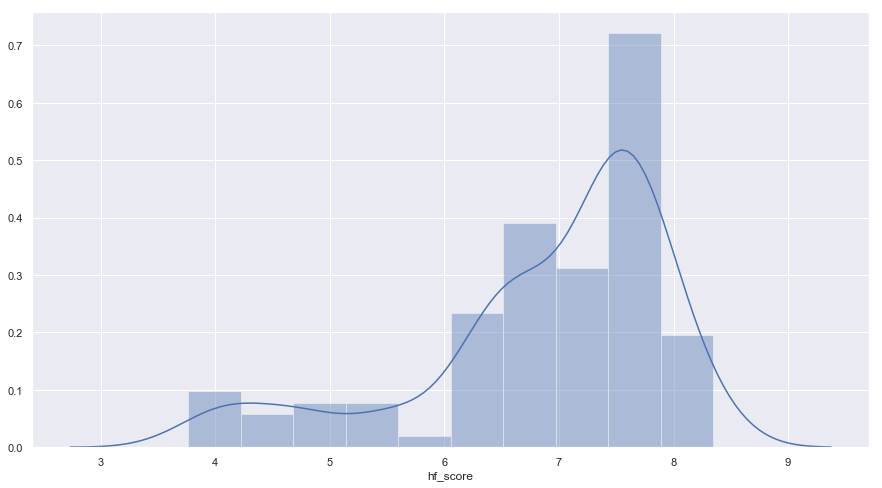

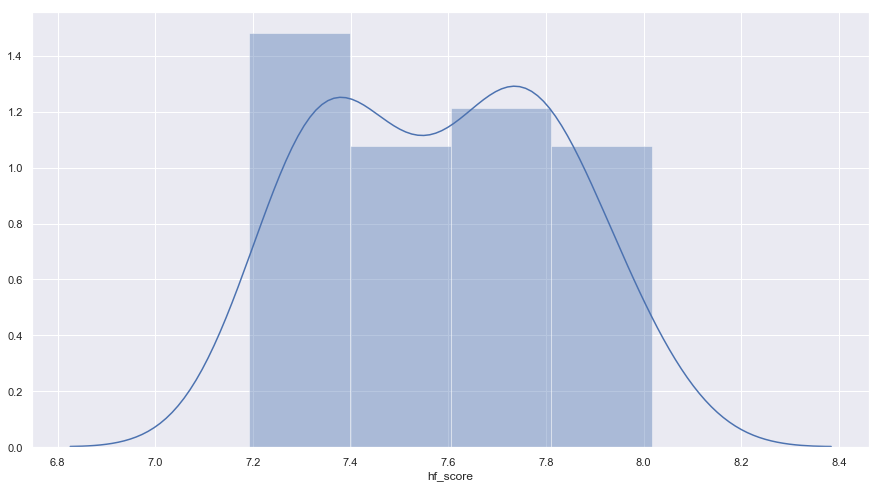

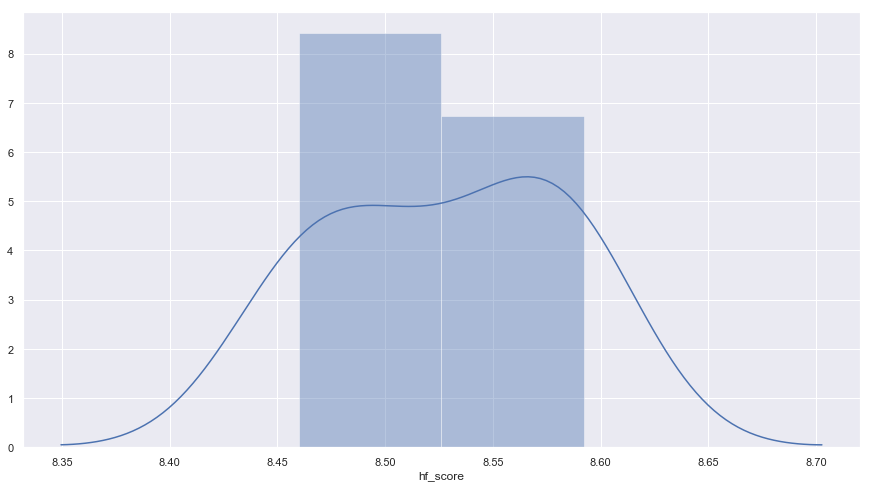

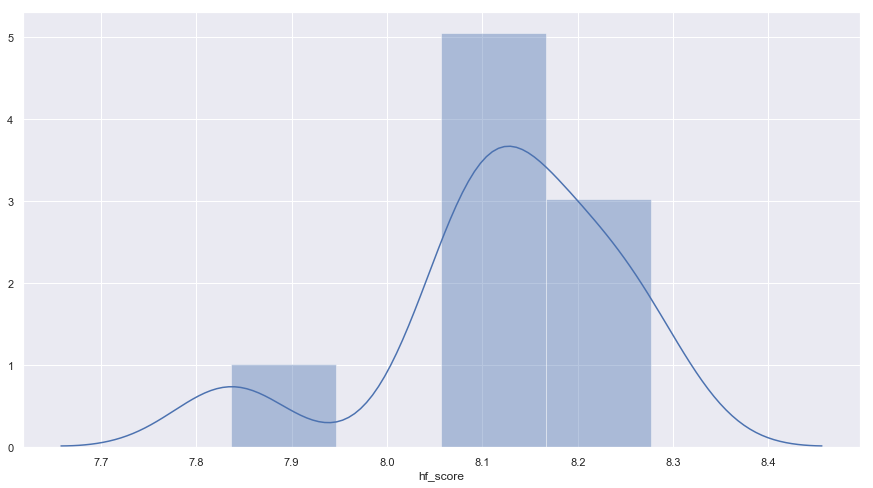

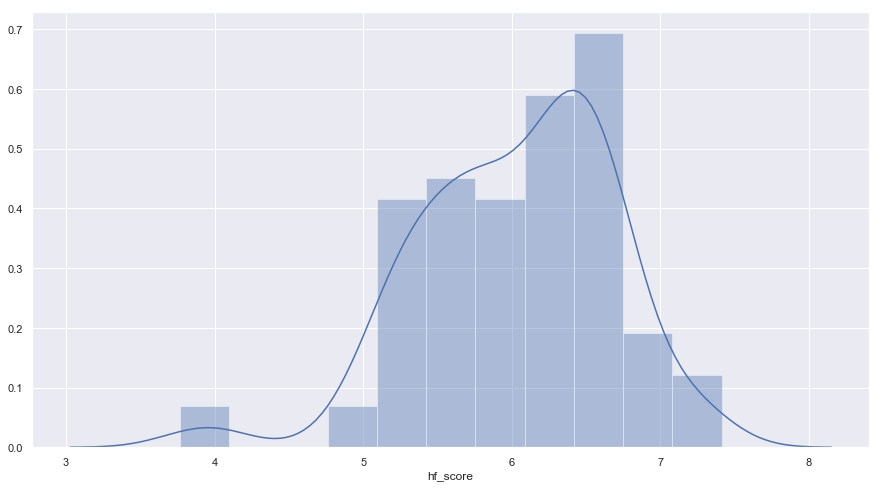

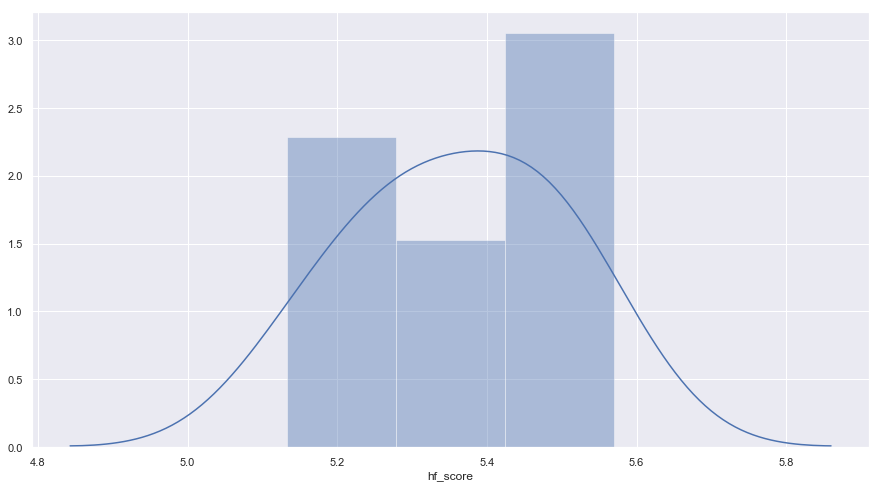

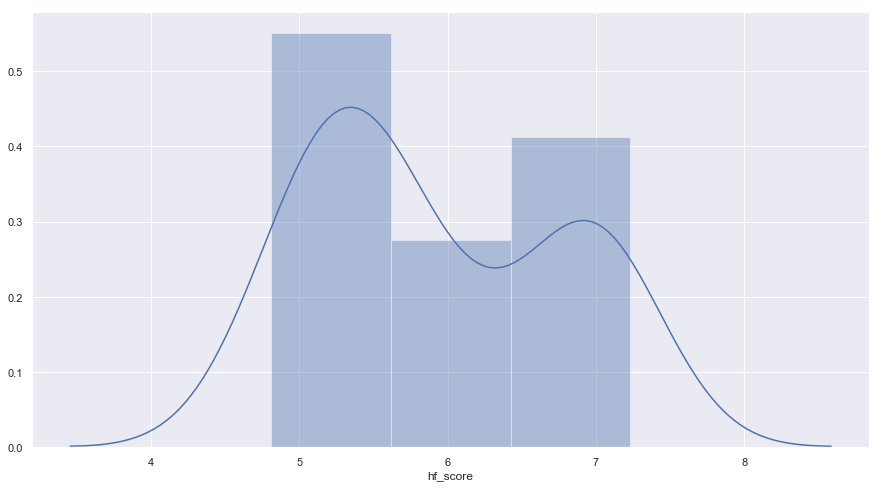

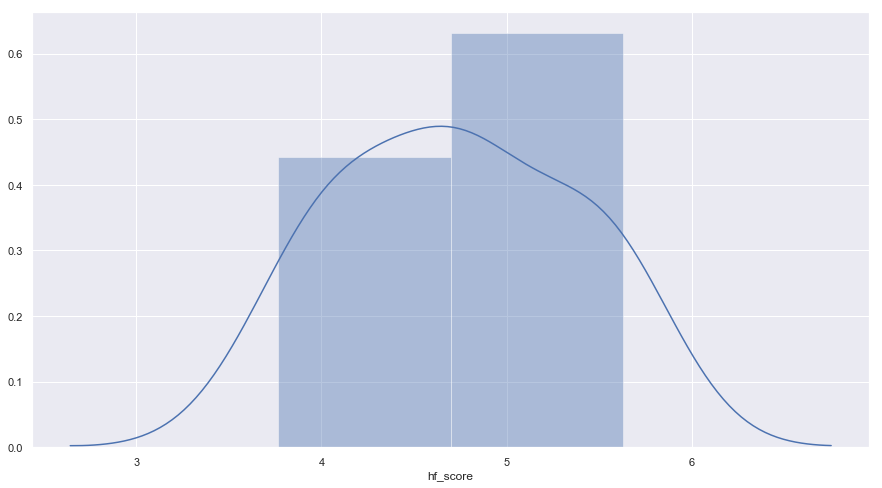

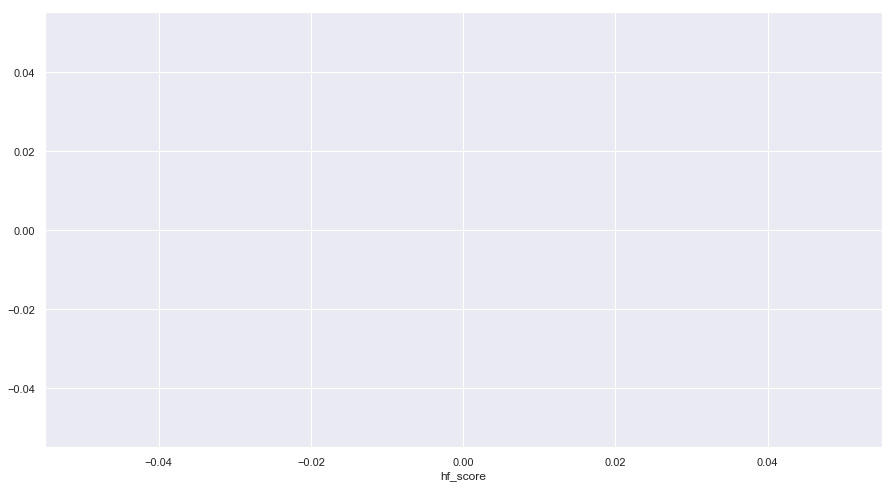

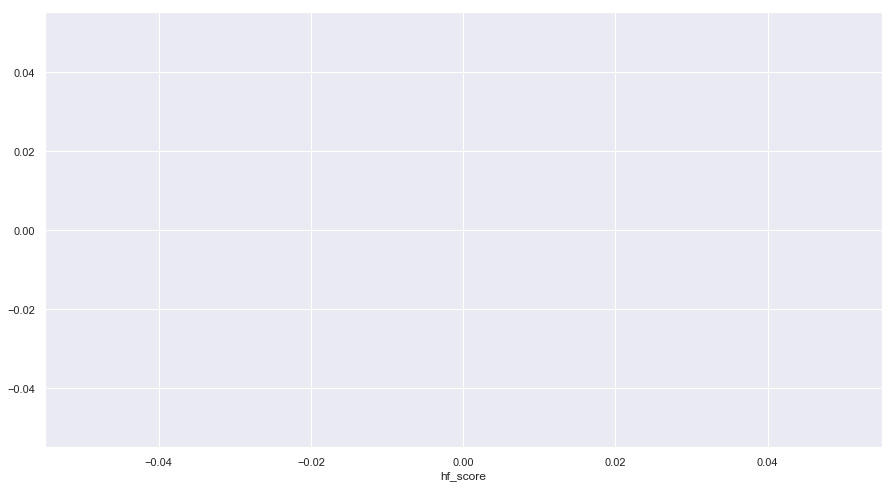

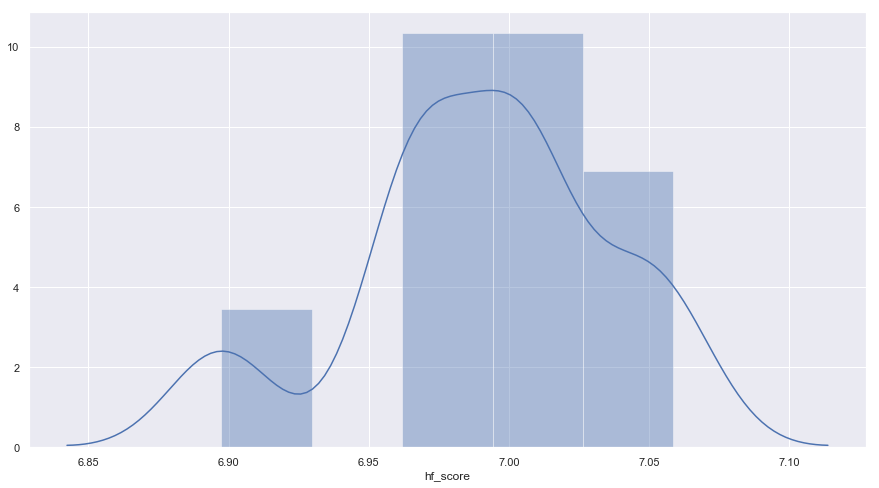

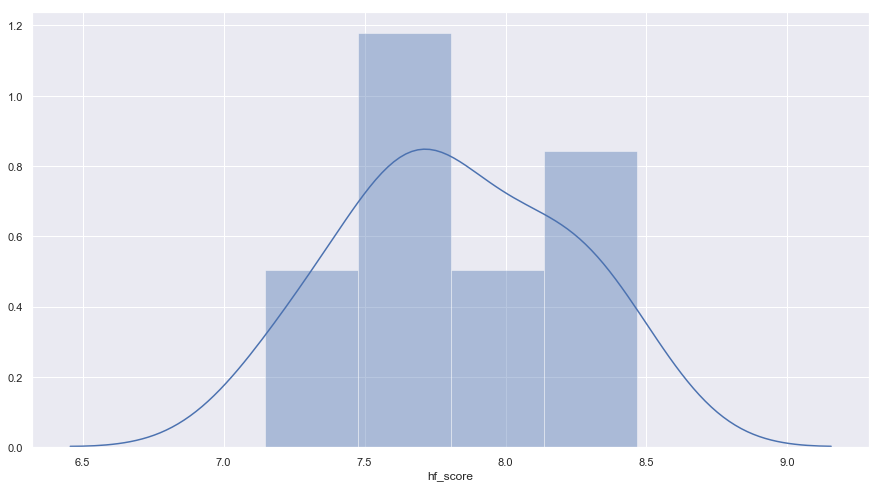

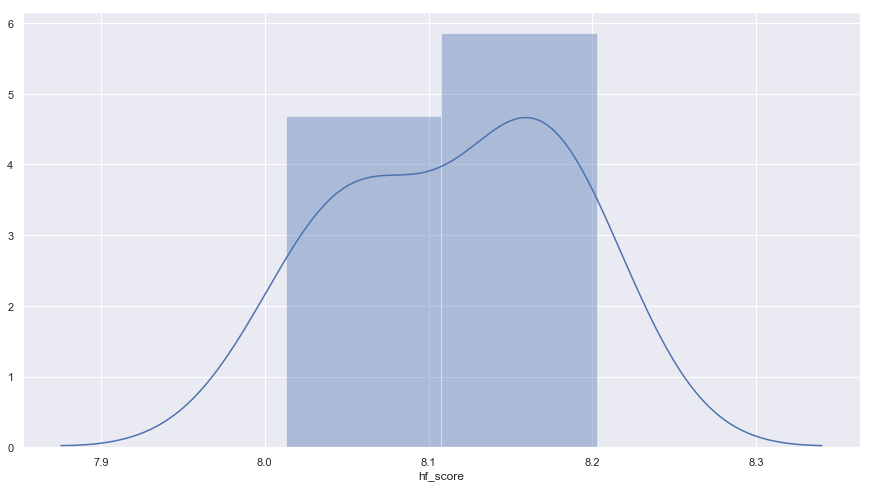

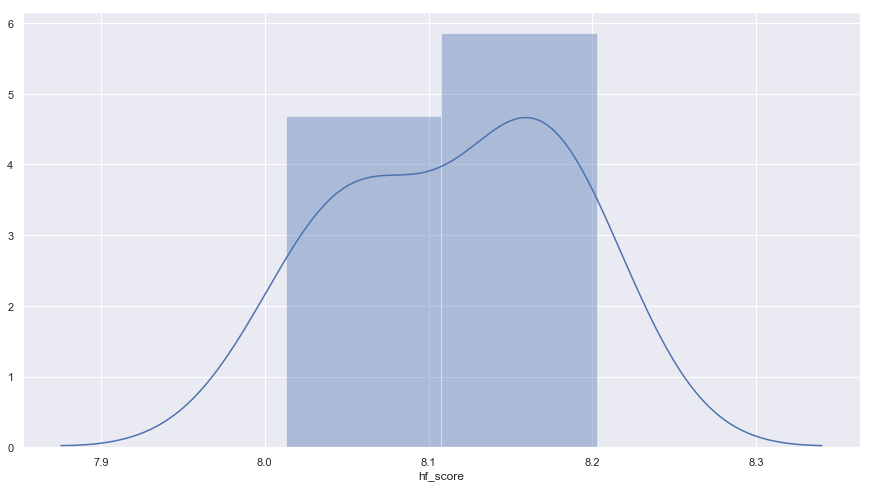

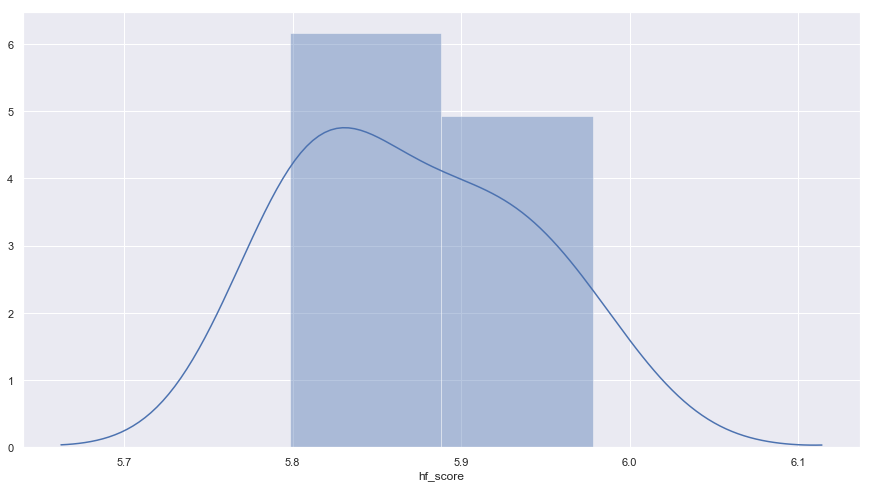

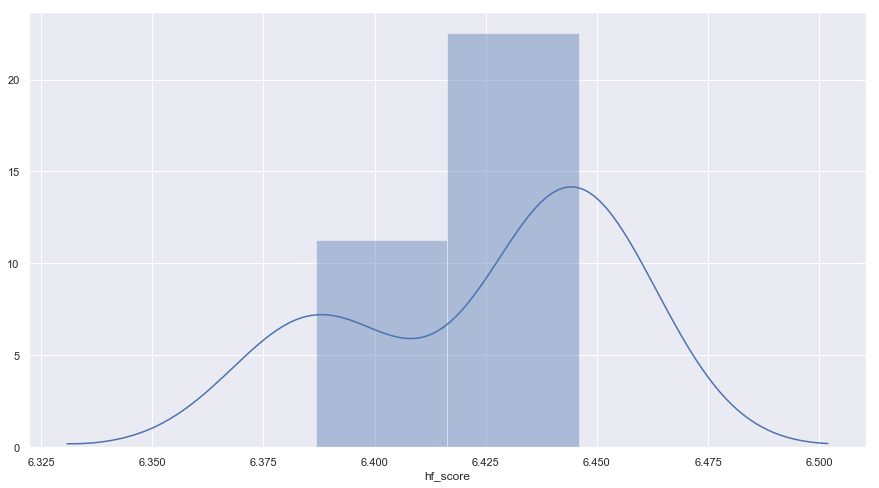

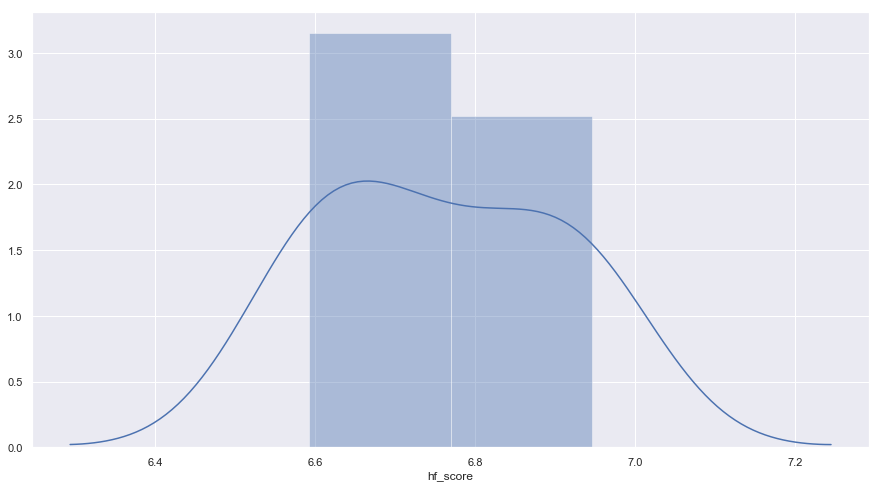

In [49]:
i = 0
for colonizer in unique_powers:
    plt.figure(i)
    colonies = list(colonies_df[colonies_df['imppower'] == colonizer]['country'])
    sns.distplot(hf_df[hf_df['countries'].isin(colonies)]['hf_score'])
    i+=1

In [56]:
country_hf_mean = hf_df.groupby('countries').mean().reset_index()
country_hf_mean

,countries,year,hf_score,hf_rank,hf_quartile
0,Albania,2012.0,7.522911,49.777778,2.000000
1,Algeria,2012.0,5.140803,147.888889,4.000000
2,Angola,2012.0,5.499577,139.555556,4.000000
3,Argentina,2012.0,6.677056,95.111111,2.888889
4,Armenia,2012.0,7.413269,53.777778,2.000000
5,Australia,2012.0,8.613201,5.444444,1.000000
6,Austria,2012.0,8.424141,13.333333,1.000000
7,Azerbaijan,2012.0,6.153984,122.888889,4.000000
8,Bahamas,2012.0,7.558520,48.888889,2.000000
9,Bahrain,2012.0,6.800512,85.777778,2.666667


/Users/vaidehidalmia/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


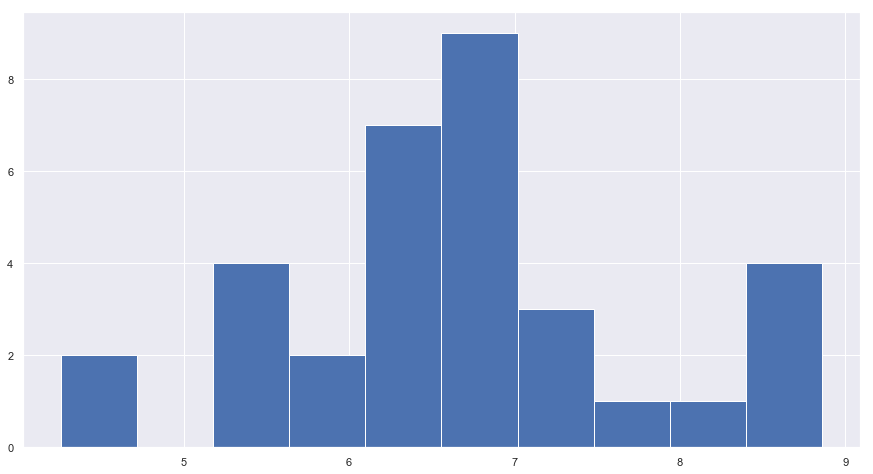

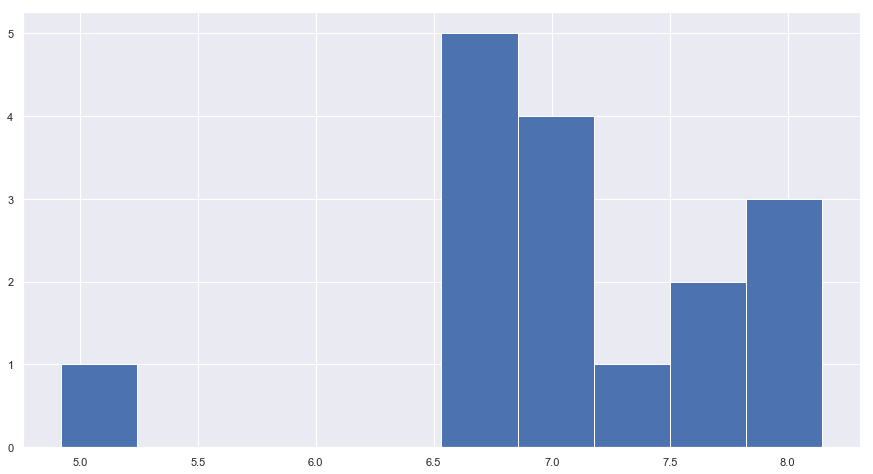

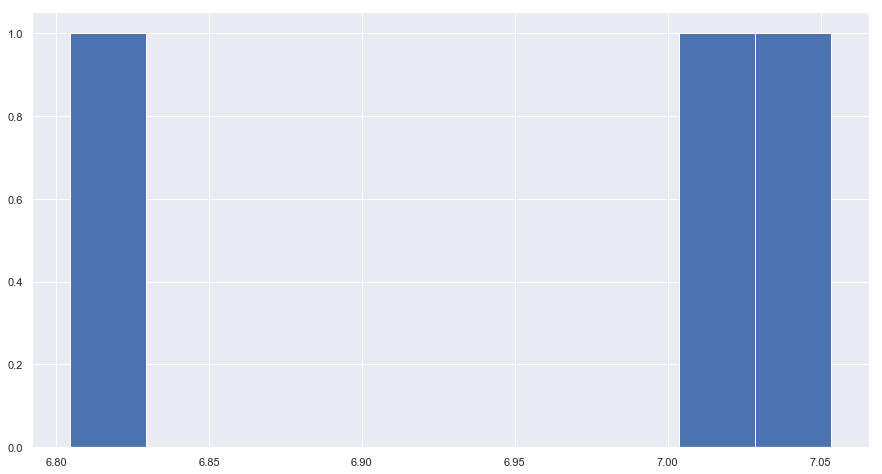

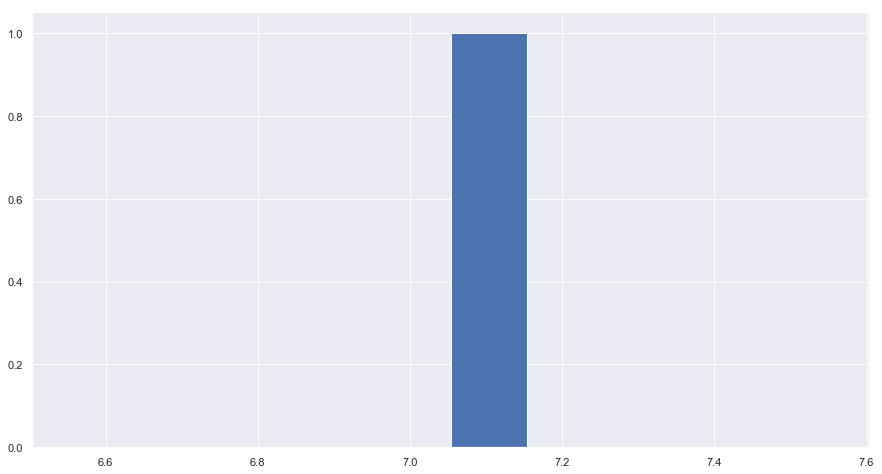

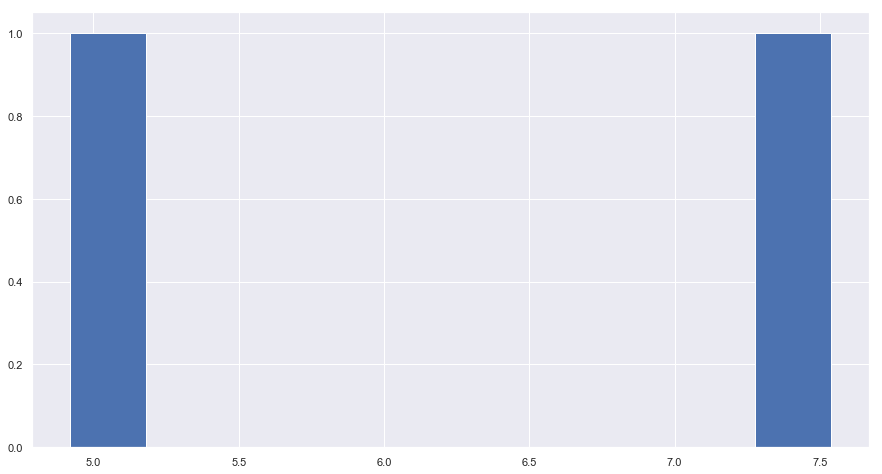

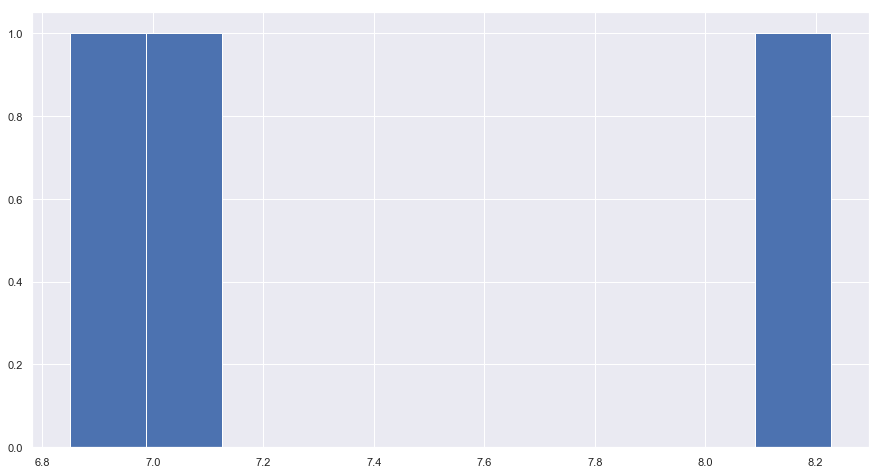

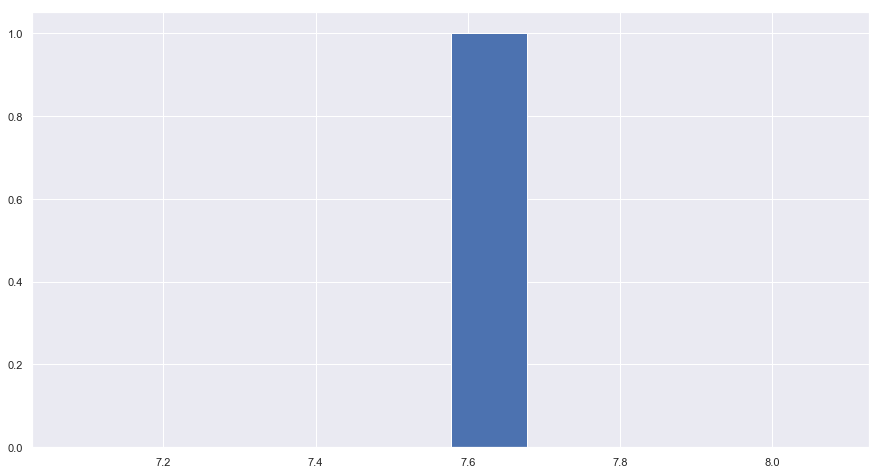

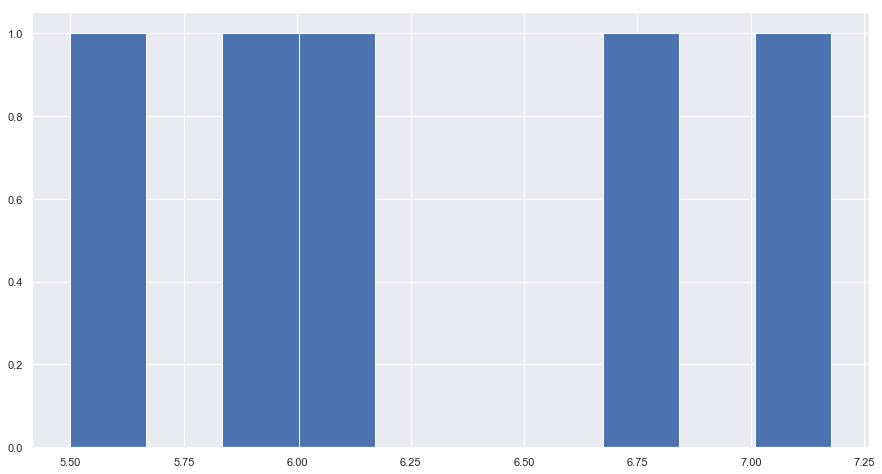

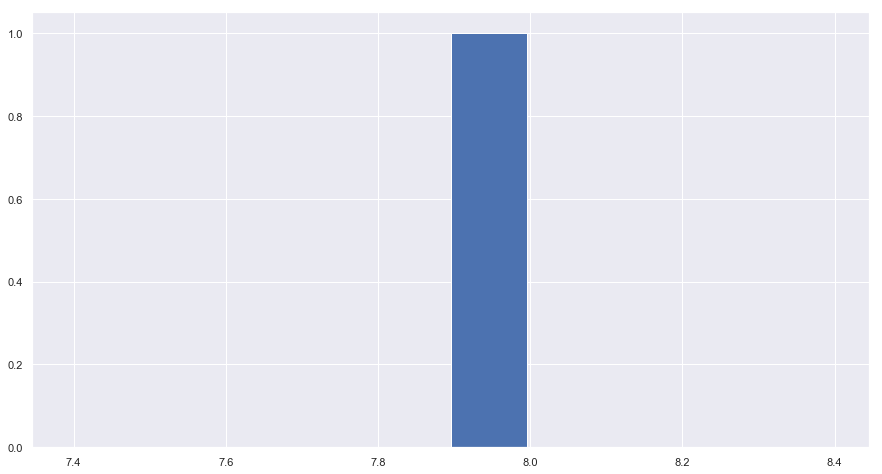

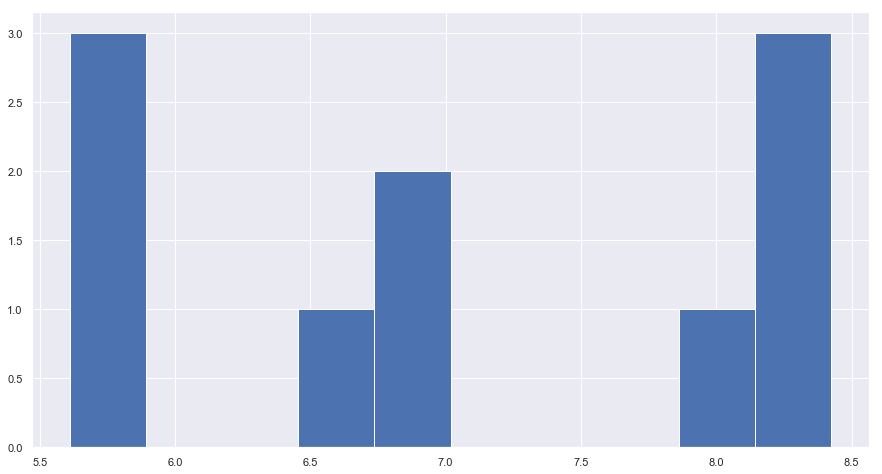

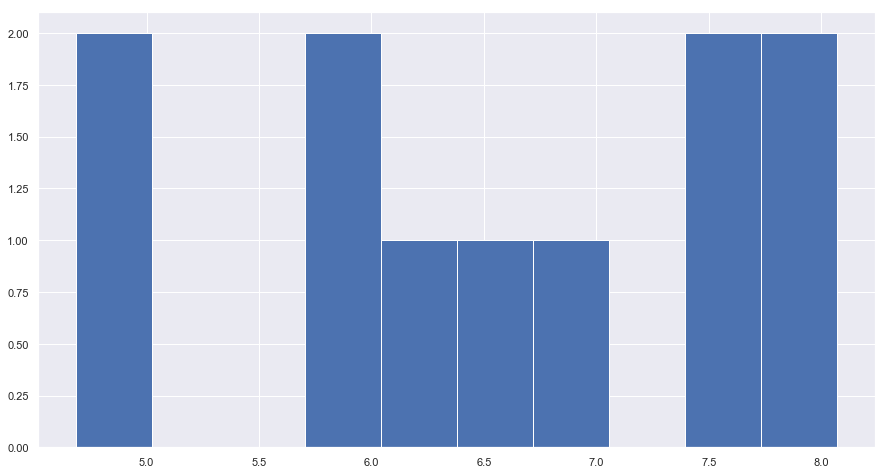

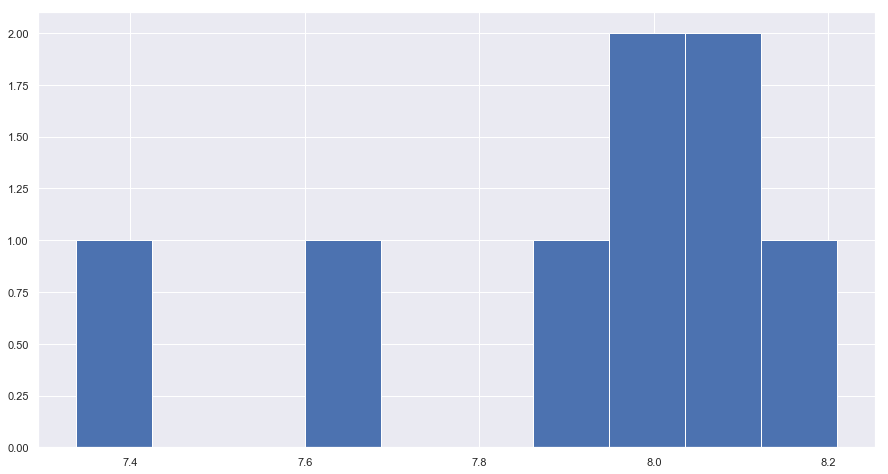

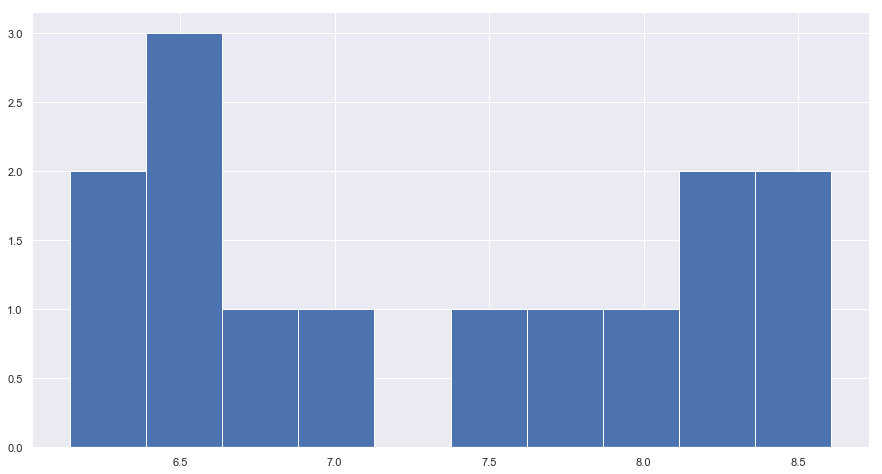

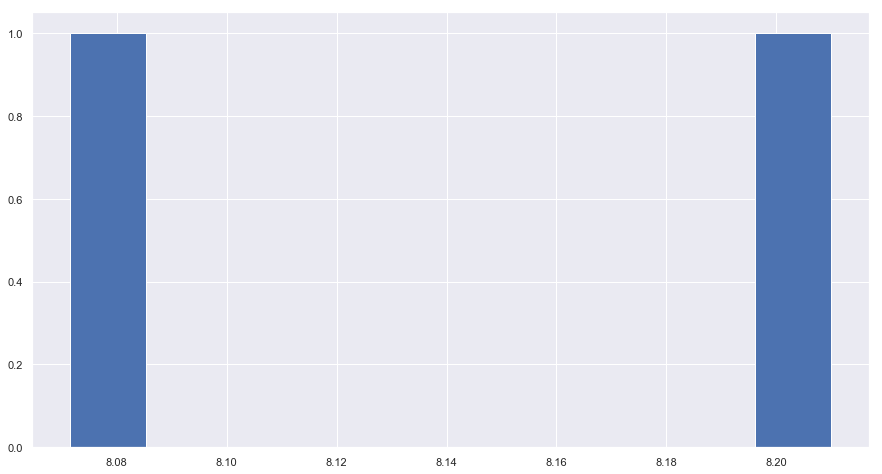

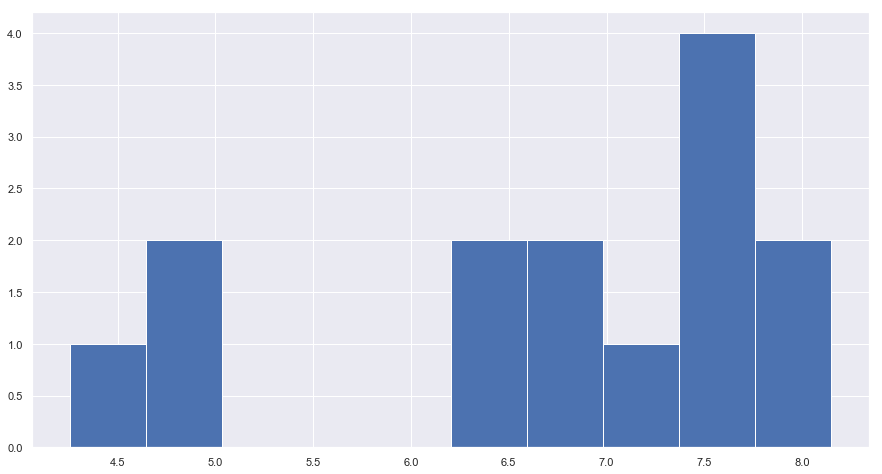

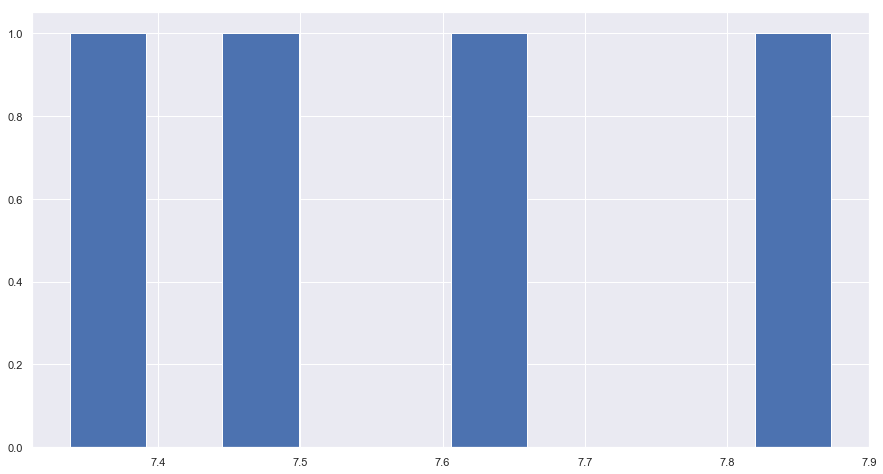

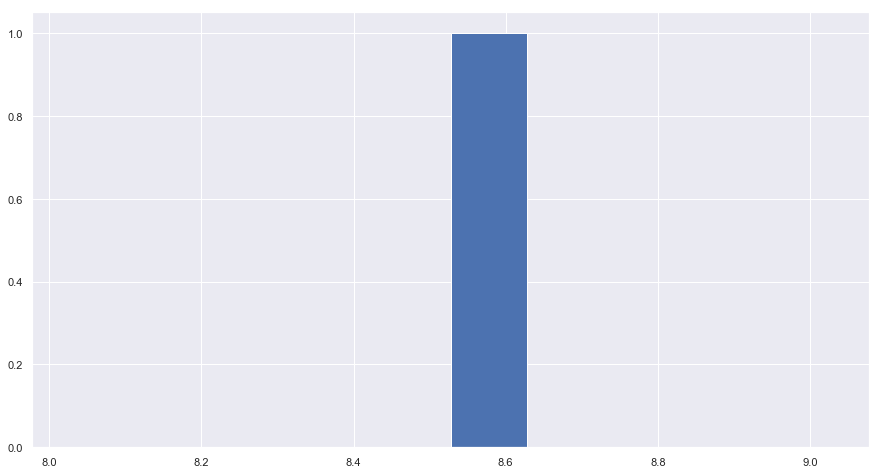

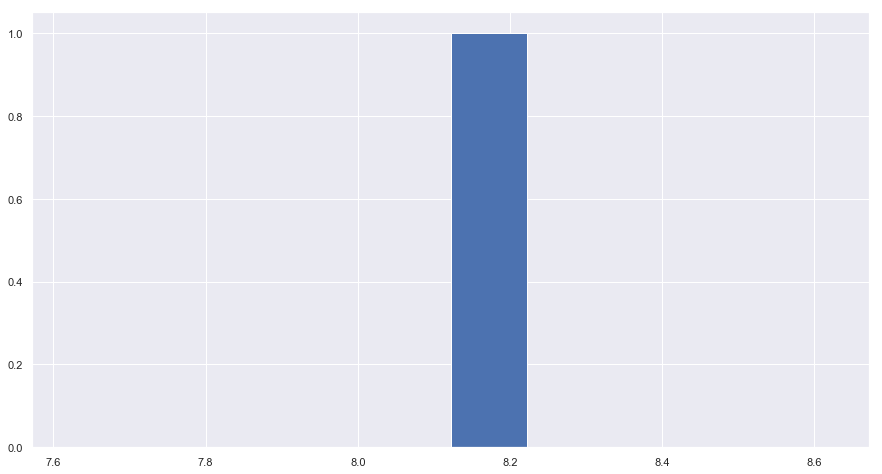

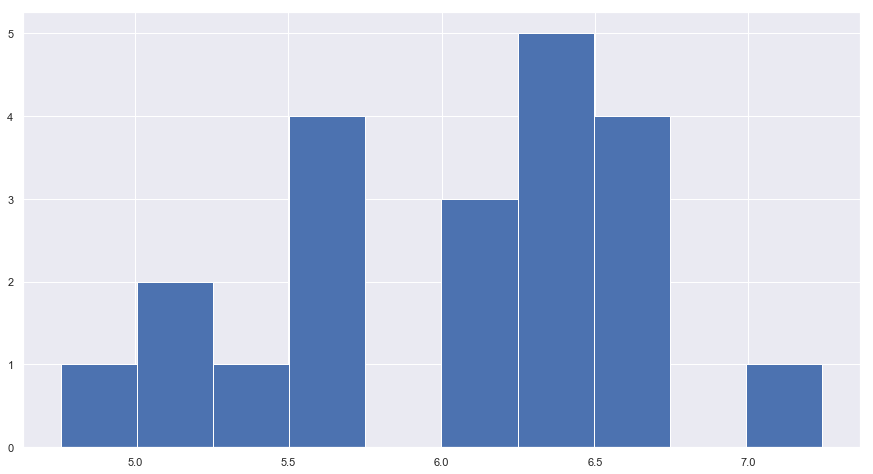

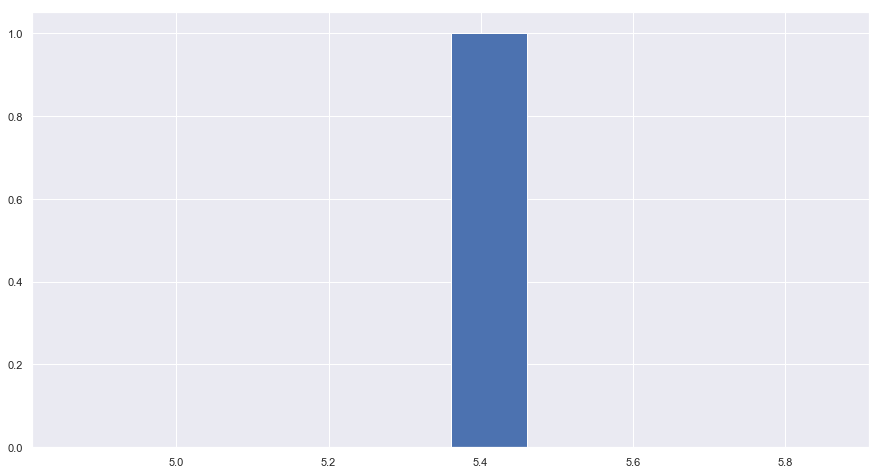

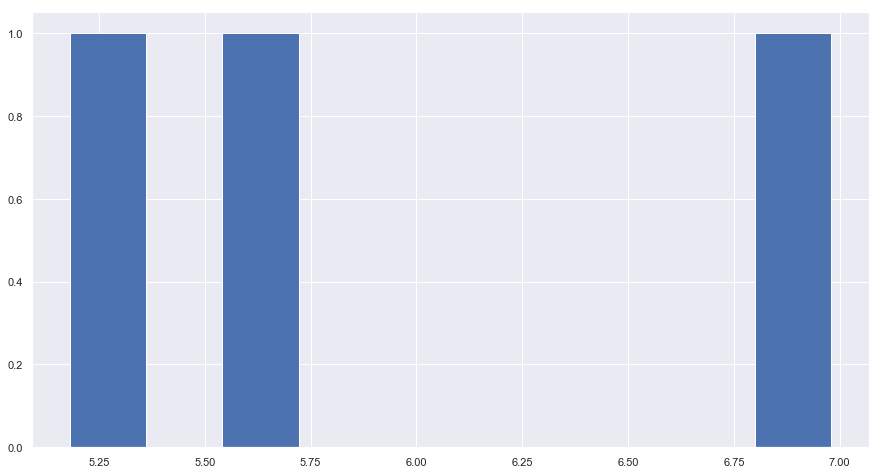

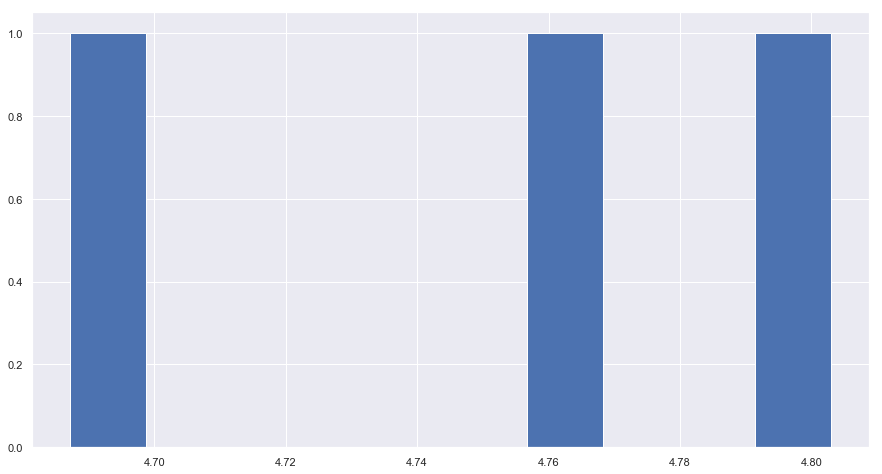

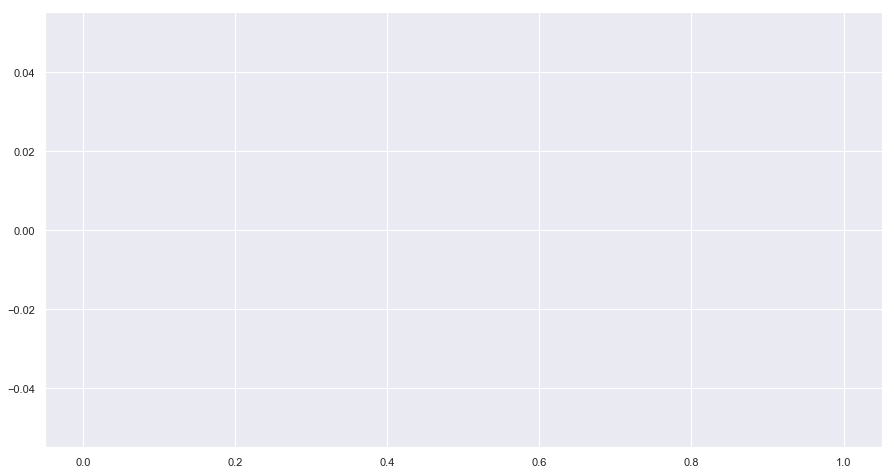

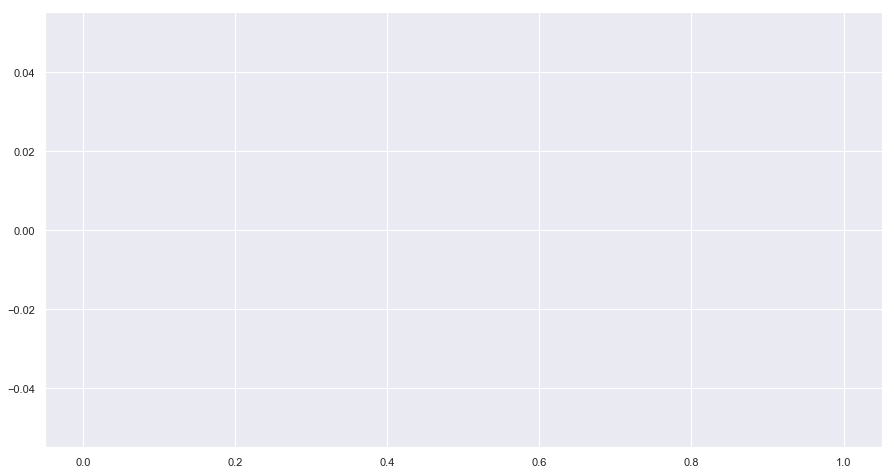

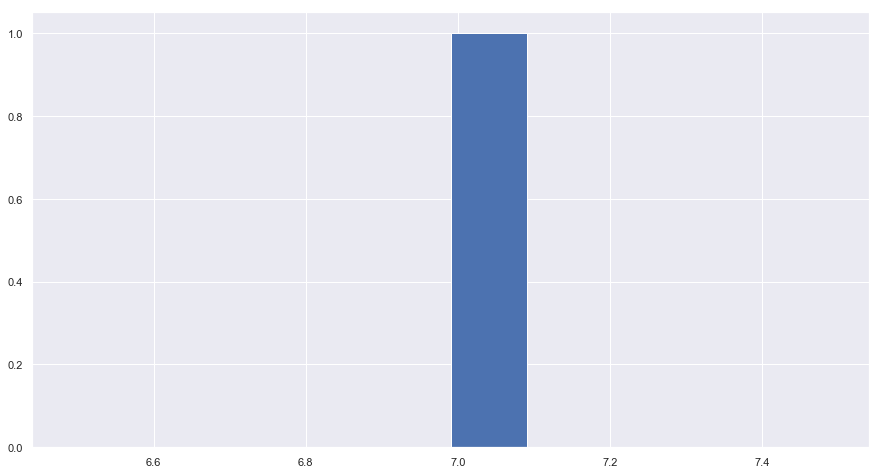

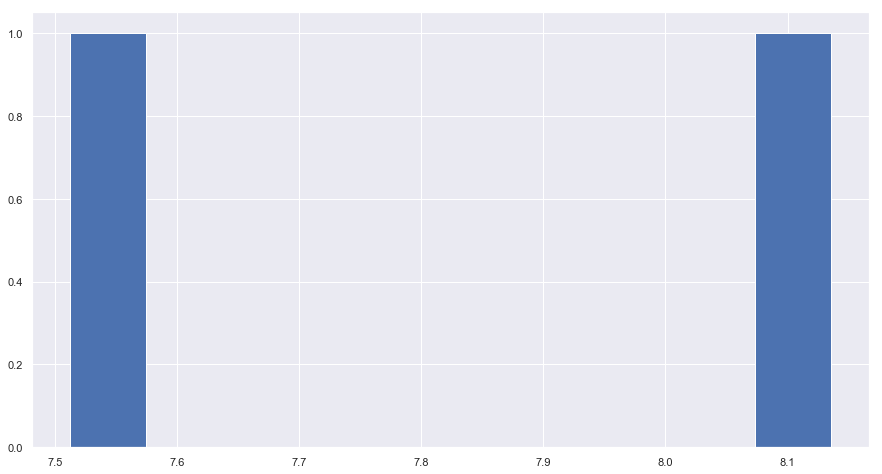

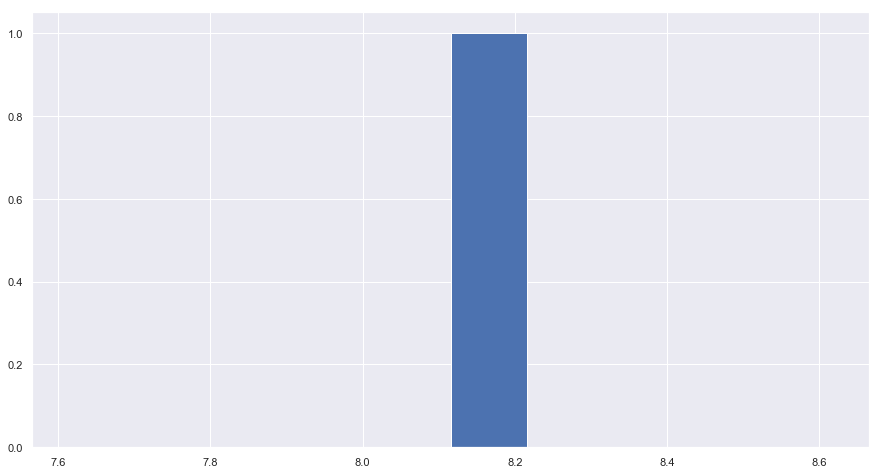

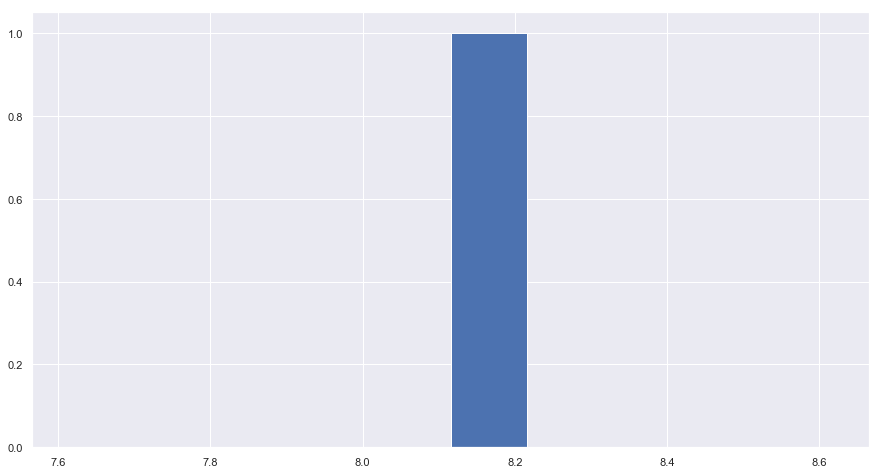

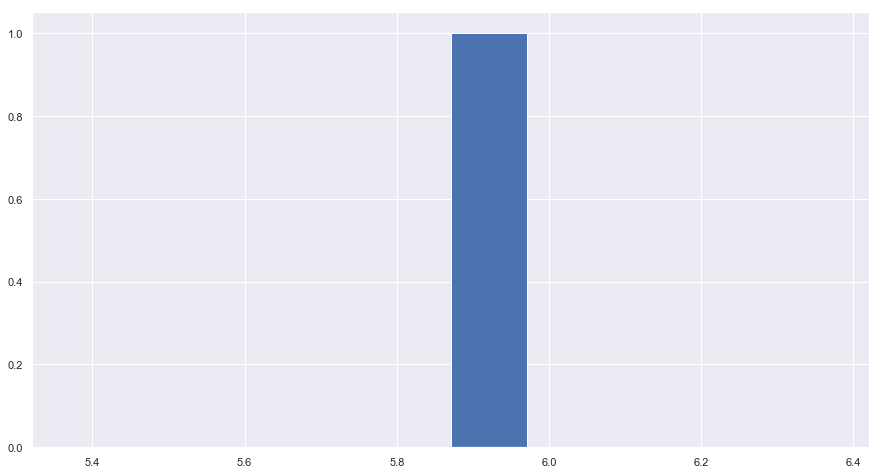

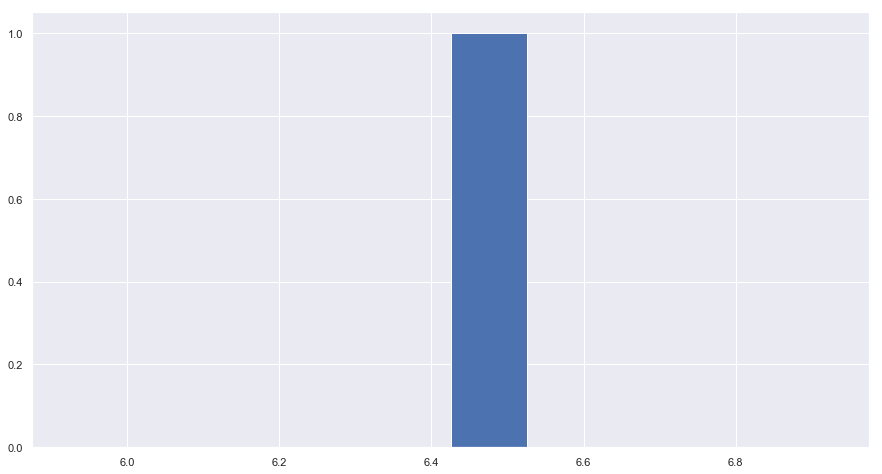

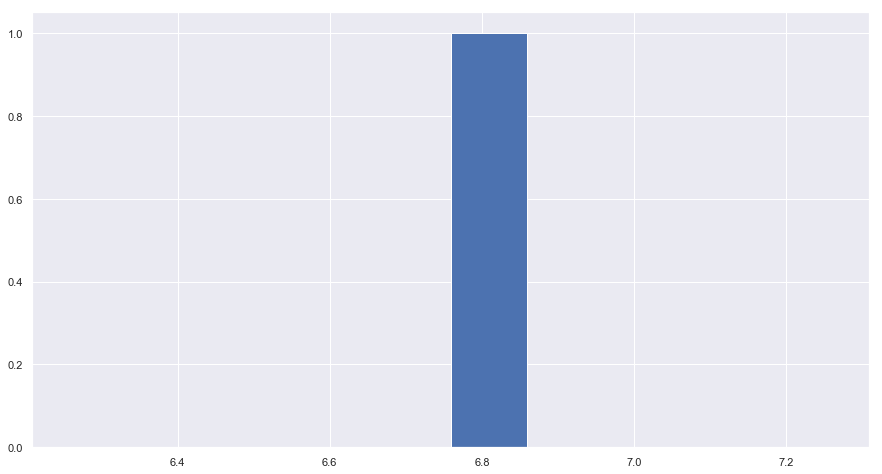

In [67]:
i = 0
for colonizer in unique_powers:
    plt.figure(i)
    colonies = list(colonies_df[colonies_df['imppower'] == colonizer]['country'])
#     print(colonizer)
    country_hf_mean[country_hf_mean['countries'].isin(colonies)]['hf_score'].hist()
#   sns.distplot(country_hf_mean[country_hf_mean['countries'].isin(colonies)]['hf_score'])
    i+=1

In [59]:
colonizer

'Australia'